In [ ]:
!pip install pyreadstat # Install pyreadstat to read the sas files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.5 MB/s eta 0:00:00


In [ ]:
!pip install tabulate # Install tabulate to print the output in tabualr form

In [ ]:
import pyreadstat # Import pyreadstat to load sas format datasets
import pandas as pd # For analysis and manipulation
import numpy as np # For analysis and manipulation
from tabulate import tabulate # To print the outcome in table format
from sklearn.preprocessing import LabelEncoder # For labelling the categorical variables
from sklearn.impute import KNNImputer # For handling the missing values
from scipy.stats import ttest_ind, pearsonr # To run t-test and to calculate the correlation coefficient
from sklearn.impute import SimpleImputer # To impute the missing values

In [ ]:
from google.colab import drive # to load files from drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# HINTS5CYCLE4

In [ ]:
# Load HINTS5CYCLE4 dataset
HINTS5CYCLE4, meta = pyreadstat.read_sas7bdat('/content/drive/MyDrive/hints5_cycle4_public.sas7bdat')

# Print the number or rows and columns of the dataset
print(HINTS5CYCLE4.shape)

# Print all the columns of HINTS5CYCLE4 dataset
print(HINTS5CYCLE4.columns.tolist())

(3865, 433)
['HHID', 'Stratum', 'APP_REGION', 'DRA', 'Treatment_H5C4', 'RUC2013', 'PR_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'Language_Flag', 'UpdateDate', 'Pandemic', 'AdultsInHH', 'MailHHAdults', 'SeekCancerInfo', 'CancerLotOfEffort', 'CancerFrustrated', 'CancerConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedCancerInfo', 'StrongNeedCancerInfo_OS', 'UseInternet', 'Internet_DialUp', 'Internet_BroadBnd', 'Internet_Cell', 'Internet_WiFi', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'InternetSpeed', 'Electronic_SelfHealthInfo', 'Electronic_TalkDoctor', 'Electronic_TestResults', 'Electronic_MadeAppts', 'HaveDevice_Tablet', 'HaveDevice_SmartPh', 'HaveDevice_CellPh', 'HaveDevice_None', 'HaveDevice_Cat', 'TabletHealthWellnessApps', 'UsedHealthWellnessApps', 'Tablet_AchieveGoal', 'Tab

In [ ]:
# Rename columns in HINTS5CYCLE4 to match with other dataset
HINTS5CYCLE4.rename(columns = {'GenderC':'BirthGender','HealthInsurance':'HealthInsurance2', 'Electronic_SelfHealthInfo':'Electronic2_HealthInfo',
                              'FamilyEverHadCancer':'FamilyEverHadCancer2','AdultsInHH':'ADULTSINHH','ProviderMaintainEMR2':'ProviderMaintainEMR'
                              ,'OfferedAccessHCP2':'OfferedAccessHCP3','OfferedAccessInsurer2':'OfferedAccessInsurer3',
                               'HadTest2_None':'NeverHadGeneticTest', 'IntRsn_VisitedSocNet': 'SocMed_Visited', 'IntRsn_SharedSocNet': 'SocMed_SharedPers','IntRsn_YouTube': 'SocMed_WatchedVid',
                               'IntRsn_SupportGroup': 'SocMed_Interacted'}, inplace = True)

# Add RUC2003 to HINTS5CYCLE4 dataset
HINTS5CYCLE4['RUC2003']=HINTS5CYCLE4['RUC2013']

In [ ]:
# Add the 'HadStoolBlood' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE4['HadStoolBlood'] = -1

# Add the 'EverHadColSig' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE4['EverHadColSig'] = -1

In [ ]:
# Print the updated columns in HINTS5CYCLE4 dsataset
print(HINTS5CYCLE4.columns.tolist())

['HHID', 'Stratum', 'APP_REGION', 'DRA', 'Treatment_H5C4', 'RUC2013', 'PR_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'Language_Flag', 'UpdateDate', 'Pandemic', 'ADULTSINHH', 'MailHHAdults', 'SeekCancerInfo', 'CancerLotOfEffort', 'CancerFrustrated', 'CancerConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedCancerInfo', 'StrongNeedCancerInfo_OS', 'UseInternet', 'Internet_DialUp', 'Internet_BroadBnd', 'Internet_Cell', 'Internet_WiFi', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'InternetSpeed', 'Electronic2_HealthInfo', 'Electronic_TalkDoctor', 'Electronic_TestResults', 'Electronic_MadeAppts', 'HaveDevice_Tablet', 'HaveDevice_SmartPh', 'HaveDevice_CellPh', 'HaveDevice_None', 'HaveDevice_Cat', 'TabletHealthWellnessApps', 'UsedHealthWellnessApps', 'Tablet_AchieveGoal', 'Tablet_MakeDecisio

# HINTS5CYCLE3

In [ ]:
# Load HINTS5CYCLE3 dataset
HINTS5CYCLE3, meta = pyreadstat.read_sas7bdat('/content/drive/MyDrive/hints5_cycle3_public.sas7bdat')

# Print the number of rows and columns of HINTS5CYCLE3 dataset
print(HINTS5CYCLE3.shape)

# Printing all the columnms of HINTS5CYCLE3 dataset
print(HINTS5CYCLE3.columns.tolist())

(5438, 725)
['HHID', 'Stratum', 'APP_REGION', 'RUC2003', 'RUC2013', 'PR_RUCA_2010', 'SEC_RUCA_2010', 'DRA', 'Treatment_H5C3', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'FormType', 'Language_Flag', 'UpdateDate', 'AdultsInHH', 'MailHHAdults', 'SeekHealthInfo', 'WhereSeekHealthInfo', 'WhoLookingFor', 'LotOfEffort', 'Frustrated', 'ConfidentGetHealthInf', 'TrustDoctor', 'TrustFamily', 'TrustGov', 'TrustCharities', 'TrustReligiousOrgs', 'StrongNeedHealthInfo', 'StrongNeedHealthInfo_OS', 'SeekCancerInfo', 'UseInternet', 'Internet_DialUp', 'Internet_BroadBnd', 'Internet_Cell', 'Internet_WiFi', 'InternetCancerInfoSelf', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'Electronic_SelfHealthInfo', 'Electronic_BuyMedicine', 'Electronic_TalkDoctor', 'Electronic_TrackedHealthCosts', 'Electronic_TestResults', 'Electronic_MadeAppts', 'Electronic_ECigHarms', 'HaveDevice_Tablet', 'HaveDevice_SmartPh', 'HaveDev

In [ ]:
# Rename columns in HINTS5CYCLE3 to match with HINTS5CYCLE4 dataset
HINTS5CYCLE3.rename(columns = {'GenderC':'BirthGender', 'Electronic_SelfHealthInfo':'Electronic2_HealthInfo',
                               'HealthInsurance':'HealthInsurance2', 'FamilyEverHadCancer':'FamilyEverHadCancer2',
                            'LotOfEffort':'CancerLotOfEffort', 'Frustrated':'CancerFrustrated','AdultsInHH':'ADULTSINHH',
                           'ConcernedQuality':'CancerConcernedQuality','TooHardUnderstand':'CancerTooHardUnderstand',
                           'ProviderMaintainEMR2':'ProviderMaintainEMR',
                           'TrustDoctor':'CancerTrustDoctor','TrustFamily':'CancerTrustFamily','TrustGov':'CancerTrustGov',
                           'TrustCharities':'CancerTrustCharities','TrustReligiousOrgs':'CancerTrustReligiousOrgs',
                           'OfferedAccessHCP2':'OfferedAccessHCP3','OfferedAccessInsurer2':'OfferedAccessInsurer3',
                           'HadTest_NeverHad':'NeverHadGeneticTest', 'IntRsn_VisitedSocNet': 'SocMed_Visited', 'IntRsn_SharedSocNet': 'SocMed_SharedPers','IntRsn_YouTube': 'SocMed_WatchedVid',
                               'IntRsn_SupportGroup': 'SocMed_Interacted'}, inplace = True)

In [ ]:
# Add the 'HadStoolBlood' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE3['HadStoolBlood'] = -1

# Add the 'EverHadColSig' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE3['EverHadColSig'] = -1

In [ ]:
# Print the updated columns in HINTS5CYCLE3 dsataset
print(HINTS5CYCLE3.columns.tolist())

['HHID', 'Stratum', 'APP_REGION', 'RUC2003', 'RUC2013', 'PR_RUCA_2010', 'SEC_RUCA_2010', 'DRA', 'Treatment_H5C3', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'FormType', 'Language_Flag', 'UpdateDate', 'ADULTSINHH', 'MailHHAdults', 'SeekHealthInfo', 'WhereSeekHealthInfo', 'WhoLookingFor', 'CancerLotOfEffort', 'CancerFrustrated', 'ConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedHealthInfo', 'StrongNeedHealthInfo_OS', 'SeekCancerInfo', 'UseInternet', 'Internet_DialUp', 'Internet_BroadBnd', 'Internet_Cell', 'Internet_WiFi', 'InternetCancerInfoSelf', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'Electronic2_HealthInfo', 'Electronic_BuyMedicine', 'Electronic_TalkDoctor', 'Electronic_TrackedHealthCosts', 'Electronic_TestResults', 'Electronic_MadeAppts', 'Electronic_ECigHarms', 'HaveDevice_Tablet', 'Ha

# HINTS5CYCLE2 dataset

In [ ]:
# Load HINTS5CYCLE2 dataset
HINTS5CYCLE2, meta = pyreadstat.read_sas7bdat('/content/drive/MyDrive/hints5_cycle2_public.sas7bdat')

# Print the number of rows and columns of HINTS5CYCLE2 dataset
print(HINTS5CYCLE2.shape)

# Printing all the columnms of HINTS5CYCLE2 dataset
print(HINTS5CYCLE2.columns.tolist())

(3504, 444)
['HHID', 'Stratum', 'APP_REGION', 'RUC2003', 'RUC2013', 'PR_RUCA_2010', 'SEC_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'FormType', 'Language_Flag', 'UpdateDate', 'AdultsInHH', 'MailHHAdults', 'SeekHealthInfo', 'WhereSeekHealthInfo', 'WhoLookingFor', 'SeekCancerInfo', 'CancerLotOfEffort', 'CancerFrustrated', 'CancerConcernedQuality', 'CancerTooHardUnderstand', 'CancerConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustNewsMag', 'CancerTrustRadio', 'CancerTrustInternet', 'CancerTrustTelevision', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedCancerInfo', 'StrongNeedCancerInfo_OS', 'UseInternet', 'Internet_DialUp', 'Internet_Broadbnd', 'Internet_Cell', 'Internet_WiFi', 'InternetCancerInfoSelf', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'Electronic_SelfHealthInfo', 'Electronic_HealthInfoSE', 'Electronic_BuyM

In [ ]:
# Rename columns in HINTS5CYCLE2 to match with HINTS5CYCLE4 dataset
HINTS5CYCLE2.rename(columns = {'GenderC':'BirthGender','HealthInsurance':'HealthInsurance2', 'Electronic_SelfHealthInfo':'Electronic2_HealthInfo',
                              'FamilyEverHadCancer':'FamilyEverHadCancer2', 'AdultsInHH':'ADULTSINHH',
                               'Employed':'Occupation_Employed','ProviderMaintainEMR2':'ProviderMaintainEMR',
                               'OfferedAccessHCP2':'OfferedAccessHCP3', 'IntRsn_VisitedSocNet': 'SocMed_Visited', 'IntRsn_SharedSocNet': 'SocMed_SharedPers','IntRsn_YouTube': 'SocMed_WatchedVid',
                               'IntRsn_SupportGroup': 'SocMed_Interacted'

                              }, inplace = True)

In [ ]:
# Add the 'HadStoolBlood' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE2['HadStoolBlood'] = -1

# Add the 'EverHadColSig' column to match with all datasets and initialize it with -1 for all entries
HINTS5CYCLE2['EverHadColSig'] = -1

In [ ]:
# Print the updated columns in HINTS5CYCLE2 dsataset
print(HINTS5CYCLE2.columns.tolist())

['HHID', 'Stratum', 'APP_REGION', 'RUC2003', 'RUC2013', 'PR_RUCA_2010', 'SEC_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'FormType', 'Language_Flag', 'UpdateDate', 'ADULTSINHH', 'MailHHAdults', 'SeekHealthInfo', 'WhereSeekHealthInfo', 'WhoLookingFor', 'SeekCancerInfo', 'CancerLotOfEffort', 'CancerFrustrated', 'CancerConcernedQuality', 'CancerTooHardUnderstand', 'CancerConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustNewsMag', 'CancerTrustRadio', 'CancerTrustInternet', 'CancerTrustTelevision', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedCancerInfo', 'StrongNeedCancerInfo_OS', 'UseInternet', 'Internet_DialUp', 'Internet_Broadbnd', 'Internet_Cell', 'Internet_WiFi', 'InternetCancerInfoSelf', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'Electronic2_HealthInfo', 'Electronic_HealthInfoSE', 'Electronic_BuyMedicine', 'Elec

# Combined the HINTS5 datasets

In [ ]:
# Merge dataserts(all 3 cycles datasets) with all variables
HINTS5_Merged= pd.concat([HINTS5CYCLE4,HINTS5CYCLE3,HINTS5CYCLE2,], ignore_index = True)

# Print the number of rows and columns of the merged dataset
print(HINTS5_Merged.shape)

# # Print the updated columns in Hintmerged_df dsataset
print(HINTS5_Merged.columns.tolist())

(12807, 1030)
['HHID', 'Stratum', 'APP_REGION', 'DRA', 'Treatment_H5C4', 'RUC2013', 'PR_RUCA_2010', 'NCHSURCODE2013', 'CENSDIV', 'CENSREG', 'VAR_STRATUM', 'VAR_CLUSTER', 'Language_Flag', 'UpdateDate', 'Pandemic', 'ADULTSINHH', 'MailHHAdults', 'SeekCancerInfo', 'CancerLotOfEffort', 'CancerFrustrated', 'CancerConfidentGetHealthInf', 'CancerTrustDoctor', 'CancerTrustFamily', 'CancerTrustGov', 'CancerTrustCharities', 'CancerTrustReligiousOrgs', 'StrongNeedCancerInfo', 'StrongNeedCancerInfo_OS', 'UseInternet', 'Internet_DialUp', 'Internet_BroadBnd', 'Internet_Cell', 'Internet_WiFi', 'WhereUseInternet_Home', 'WhereUseInternet_Work', 'WhereUseInternet_PublicPlace', 'WhereUseInternet_MobileDevice', 'InternetSpeed', 'Electronic2_HealthInfo', 'Electronic_TalkDoctor', 'Electronic_TestResults', 'Electronic_MadeAppts', 'HaveDevice_Tablet', 'HaveDevice_SmartPh', 'HaveDevice_CellPh', 'HaveDevice_None', 'HaveDevice_Cat', 'TabletHealthWellnessApps', 'UsedHealthWellnessApps', 'Tablet_AchieveGoal', 'Tabl

# Function to add the column name Ever_Tested_Colon

In [ ]:
# Define a function to find the number of screening uptakes
def add_ever_tested_colon_column(df):
    # Copy the DataFrame to reduce fragmentation
    df = df.copy()

    # Initialize 'Ever_Tested_Colon' column with -1 for all rows
    df['Ever_Tested_Colon'] = -1

    # Set the value to 1 if any of the specified conditions are met
    tested_conditions = (df['EverTestedColonCa'] == 1) | \
                        (df['EverHadColSig'] == 1) | \
                        (df['HadStoolBlood'] == 1)

    df.loc[tested_conditions, 'Ever_Tested_Colon'] = 1

    # Set the value to 0 if any of the specified conditions are met
    not_tested_conditions = (df['EverTestedColonCa'] == 2) | \
                            (df['EverHadColSig'] == 2) | \
                            (df['HadStoolBlood'] == 2)
    df.loc[not_tested_conditions, 'Ever_Tested_Colon'] = 0

    return df

# Apply the function to the dataset
HINTS5_Merged = add_ever_tested_colon_column(HINTS5_Merged)

In [ ]:
# List of datasets and their names to calculate the number of screening uptakes
# in each cycle dataset
datasets = [
    ('HINTS5CYCLE4', HINTS5CYCLE4),
    ('HINTS5CYCLE3', HINTS5CYCLE3),
    ('HINTS5CYCLE2', HINTS5CYCLE2),
    ('HINTS5_Merged', HINTS5_Merged)
]

# Create a dictionary to store the counts
ever_tested_Colon_counts = {}

# Iterate over each dataset, apply the function, and count the cases
for name, df in datasets:
    df = add_ever_tested_colon_column(df)
    ever_tested_Colon_counts[name] = df[df['Ever_Tested_Colon'] == 1].shape[0]

# Print the results
for name, count in ever_tested_Colon_counts.items():
    print(f'Total number of cases with ever tested colon cancer in {name}: {count}')

Total number of cases with ever tested colon cancer in HINTS5CYCLE4: 2351
Total number of cases with ever tested colon cancer in HINTS5CYCLE3: 3269
Total number of cases with ever tested colon cancer in HINTS5CYCLE2: 2081
Total number of cases with ever tested colon cancer in HINTS5_Merged: 7701


In [ ]:
HINTS5_Merged['Ever_Tested_Colon'].value_counts()

,count
Ever_Tested_Colon,
1,7701
0,4690
-1,416


In [ ]:
# Filter the dataset to keep only rows where the target variable is 1 or 0
HINTS5_Merged = HINTS5_Merged[HINTS5_Merged['Ever_Tested_Colon'].isin([1, 0])]

# Check the distribution of the target variable
print(HINTS5_Merged['Ever_Tested_Colon'].value_counts())

# Print the shape of the final datasets for supervised learning
print("The shape of the final datasets:", HINTS5_Merged.shape)

Ever_Tested_Colon
1    7701
0    4690
Name: count, dtype: int64
The shape of the final datasets: (12391, 1031)


In [ ]:
# Identify categorical variables if they are stored as 'object' dtype
categorical_columns = HINTS5_Merged.select_dtypes(include=['object']).columns.tolist()

# Print the categorical variables
print("Categorical variables HINTS5_Merged:")
print(categorical_columns)

# Print the total number of categorical variables
print(f"Total number of categorical variables: {len(categorical_columns)}")

Categorical variables HINTS5_Merged:
['Stratum', 'APP_REGION', 'VAR_STRATUM', 'UpdateDate', 'StrongNeedCancerInfo_OS', 'HealthIns_Other_OS', 'Caregiving_Other_OS', 'HeardGenTest_Other_OS', 'TestSource_Other_OS', 'HadTest2_Other_OS', 'CaOther_OS', 'Occupation_Other_OS', 'SexualOrientation_OS', 'StrongNeedHealthInfo_OS', 'WhoOffered_Other_OS', 'NotAccessed_Other_OS', 'OccupationStatus_OS', 'FORM_NAME']
Total number of categorical variables: 18


In [ ]:
# Identify the categorical columns of the merged dataset
categorical_cols = HINTS5_Merged.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply the LabelEncoder to each categorical column
for col in categorical_cols:
    # Convert the column to string type to avoid mixed type issues
    HINTS5_Merged.loc[:, col] = HINTS5_Merged[col].astype(str)

    # Handle NaN values: Temporarily replace NaN with a unique value that will not interfere
    HINTS5_Merged.loc[:, col] = HINTS5_Merged[col].replace('nan', np.nan)
    mask = HINTS5_Merged[col].notnull()

    # Apply the LabelEncoder only to non-null values and add 1 to start labels from 1 instead of 0
    HINTS5_Merged.loc[mask, col] = le.fit_transform(HINTS5_Merged.loc[mask, col]) + 1

# Check if all columns are numeric
numeric_cols = HINTS5_Merged.select_dtypes(include=['number']).columns
all_numeric = len(numeric_cols) == len(HINTS5_Merged.columns)

if all_numeric:
    print("All variables are numerical.")
else:
    print("There are still some non-numerical variables.")
    non_numeric_cols = set(HINTS5_Merged.columns) - set(numeric_cols)
    print(f"Non-numeric columns: {non_numeric_cols}")

There are still some non-numerical variables.
Non-numeric columns: {'TestSource_Other_OS', 'APP_REGION', 'Occupation_Other_OS', 'UpdateDate', 'StrongNeedHealthInfo_OS', 'NotAccessed_Other_OS', 'HealthIns_Other_OS', 'VAR_STRATUM', 'OccupationStatus_OS', 'Caregiving_Other_OS', 'Stratum', 'StrongNeedCancerInfo_OS', 'HadTest2_Other_OS', 'SexualOrientation_OS', 'HeardGenTest_Other_OS', 'CaOther_OS', 'FORM_NAME', 'WhoOffered_Other_OS'}


In [ ]:
# Merge categories for RUC2003: 8 and 9 to 8
HINTS5_Merged.loc[:, 'RUC2003'] = HINTS5_Merged['RUC2003'].replace({9: 8})

# Merge categories for RaceEthn: 4, 6, and 7 to 8
HINTS5_Merged.loc[:, 'RaceEthn'] = HINTS5_Merged['RaceEthn'].replace({4: 8, 6: 8, 7: 8})

In [ ]:
# Convert 'MaritalStatus' into a binary with -1 preserved (Married = 1, missing = -1, and all others = 0)
HINTS5_Merged.loc[:, 'MaritalStatus'] = HINTS5_Merged['MaritalStatus'].apply(lambda x: 1 if x == 1 else (-1 if x == -1 else 0))

# Verify the conversion
print(HINTS5_Merged['MaritalStatus'].value_counts())

MaritalStatus
0.0    6463
1.0    5928
Name: count, dtype: int64


# Converting RaceEthn into binary

In [ ]:
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] == 1, 'RaceEthn_Hispanic'] = 1
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] != 1, 'RaceEthn_Hispanic'] = 0

HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] == 2, 'RaceEthn_White'] = 1
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] != 2, 'RaceEthn_White'] = 0

HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] == 3, 'RaceEthn_Black'] = 1
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] != 3, 'RaceEthn_Black'] = 0

HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] == 5, 'RaceEthn_Asian'] = 1
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] != 5, 'RaceEthn_Asian'] = 0

HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] == 8, 'RaceEthn_Others'] = 1
HINTS5_Merged.loc[HINTS5_Merged['RaceEthn'] != 8, 'RaceEthn_Others'] = 0

In [ ]:
# Drop the RaceEthn from the HIntmerged_df1 dataset
HINTS5_Merged.drop(columns=['RaceEthn'], inplace=True)

In [ ]:
HINTS5_Merged['RaceEthn_White'].value_counts()

,count
RaceEthn_White,
1.0,7057
0.0,5334


In [ ]:
# Complete list of variables to drop from the dataset
variables_to_drop = [
    'AmerInd', 'Asian', 'AsInd', 'BC14FreqMammogram_OS', 'BC9WhyNotMammogram_OS',
    'Black', 'BR02Vegetables','BR55WhichLungTests_OS','BR58WhyPapTest_OS','BR63SourceHPVKnowledge_OS','BR75WhyNoVaccineForDaughter_OS',
    'BR84TestRecommended_OS','CA02TypeofSPsCancer_OS','CA07TypeFamilyCancer_OS','CA10WhoSeekCancerInfo_OS','CA11LookCancerInfo','CA12WhereLookCancerInfo_OS',
    'CA13WhatLookCancerInfo_OS','CA18WhereGoFirst_OS','Cancer_Cat','CancerType','CaOther_OS','Caregiving_Other_OS','CaseNo','CC01TestsForColonCancer_OS',
    'CC10WhyNotStoolBlood_OS','CC15FreqStoolBlood_OS','CC20WhyNotSigCol_OS','CC25FreqSigCol_OS','CC4TestsForColonCancer_OS','CH2TypeOfSPsCancer_OS',
    'CH3WhenDiagnosedCancer_Year','CK10ChangeBehavior_1OS','CK10ChangeBehavior_2OS','CK11ChangeDiet_OS','CK12GetTested_OS','CK13nRaceEthnicity',
    'CK4ReduceCancer_1OS','CK4ReduceCancer_2OS','CK4ReduceCancer_3OS','CK5EatReduceCancer_OS','CK6TestsReduceCancer_OS','CS19WhenDiagnosedCancer_YEAR',
    'Cuban','DM05Race1','DM05Race5','DM05Race2','DM05Race3','DM05Race4','DM07YearCameToUSA','DM14aIncome25Thousand','DM14bIncome20Thousand','DM14cIncome15Thousand',
    'DM14dIncome10Thousand','DM14eIncome35Thousand','DM14fIncome50Thousand','DM14gIncome75Thousand','DM14hIncome100Thousand','DM14iIncomeOver100Thousand',
    'DM14Income','DM14jIncomeOver200Thousand','DM4Hispanic','DM5Race1','DM5Race2','DM5Race3','DM5Race4','DM5Race5','DM7aIncome25Thousand','DM7bIncome20Thousand',
    'DM7cIncome15Thousand','DM7dIncome10Thousand','DM7eIncome35Thousand','DM7fIncome50Thousand','DM7gIncome75Thousand','DM7hIncomeOver75Thousand',
    'EducA','EducB','EWGT','EX4ExerciseLowerWhichCancer_OS','ExRec_Cat','FamilyCancer_Cat','FDASite_OtherOS','Filipino','FORM_NAME','FormType','GA2WhereUseInternet_OS',
     'GA3WhereUseInternetMost','GA4AAccessInternet_OS',
    'HadTest_Cat','HadTest2_Other_OS','HaveDevice_Cat','Hawaiian','HC02WhereSeekHealthInfo_OS','HC03WhereSeekHealthInfo2_OS','HC10WhatCancerInfoLookFor_OS',
    'HC11WhereSeekCancerInfo_OS','HC11WhoSeekCancerInfo_OS','HC13WhereLookCancerInfo_OS','HC15WhereGoFirst_OS','HC16IAnotherSource_OS',
    'HC17AccessInternetHome_OS','HC23AccessInternet_OS','HC26gAnythingElseOnline_OS','HC28WhereLastOnline_OS','HC2ProviderType_OS','HC33WhyUseInternet_OS',
    'HCCoverage_OtherOS','HD05OccupationStatus_OS','HD08Hispanic','HD09Race1','HD09Race2','HD09Race3','HD09Race4','HD09Race5','HD11YearCameToUSA',
    'HD15Income','HD15IncomeRanges','HealthIns_Other_OS','HeardGenTest_Cat','HeardGenTest_Other_OS','HHAdultAge1','HHAdultAge2','HHAdultAge3','HHAdultAge4',
    'HHAdultAge5','HHAdultAge6','HHAdultGender1','HHAdultGender2','HHAdultGender3','HHAdultGender4','HHAdultGender5','HHAdultGender6','HHAdultMOB1',
    'HHAdultMOB2','HHAdultMOB3','HHAdultMOB4','HHAdultMOB5','HHAdultMOB6','HHID','Hisp_Cat','Hispanic','HS02WhatTypeProvider_OS','HS16WhyAvoidDr_OS',
    'IncomeRanges_IMP','InternetCancerInfoSite_OS','InternetHealthInfoSite_OS','InterviewDate','Japanese','Korean','Mexican','MM04ReduceCancerC_OS',
    'MM04ReduceCancerL_OS','MM04ReduceCancerS_OS','MM05bTooManyRecommendationsC','MM05bTooManyRecommendationsL','MM05bTooManyRecommendationsS',
    'MM05fEverythingCausesCancerC','MM05fEverythingCausesCancerL','MM05fEverythingCausesCancerS','MM06SymptomsOfCancerC_OS','MM06SymptomsOfCancerL_OS',
    'MM06SymptomsOfCancerS_OS','MM07HowManySurvive','MPRecall_OtherOS','MWGT0', 'MWGT1', 'MWGT2', 'MWGT3', 'MWGT4', 'MWGT5', 'MWGT6', 'MWGT7',
    'MWGT8', 'MWGT9', 'MWGT10', 'MWGT11', 'MWGT12', 'MWGT13', 'MWGT14', 'MWGT15', 'MWGT16', 'MWGT17', 'MWGT18', 'MWGT19', 'MWGT20', 'MWGT21',
    'MWGT22', 'MWGT23', 'MWGT24', 'MWGT25', 'MWGT26', 'MWGT27', 'MWGT28', 'MWGT29', 'MWGT30', 'MWGT31', 'MWGT32', 'MWGT33', 'MWGT34', 'MWGT35',
    'MWGT36', 'MWGT37', 'MWGT38', 'MWGT39', 'MWGT40', 'MWGT41', 'MWGT42', 'MWGT43', 'MWGT44', 'MWGT45', 'MWGT46', 'MWGT47', 'MWGT48', 'MWGT49',
    'MWGT50', 'NCHSURCODE2013','NotAccessed_Other_OS','NWGT','nwgt0', 'nwgt1', 'nwgt2', 'nwgt3', 'nwgt4', 'nwgt5', 'nwgt6', 'nwgt7', 'nwgt8', 'nwgt9',
    'nwgt10', 'nwgt11', 'nwgt12', 'nwgt13', 'nwgt14', 'nwgt15', 'nwgt16', 'nwgt17', 'nwgt18', 'nwgt19', 'nwgt20', 'nwgt21', 'nwgt22', 'nwgt23',
    'nwgt24', 'nwgt25', 'nwgt26', 'nwgt27', 'nwgt28', 'nwgt29', 'nwgt30', 'nwgt31', 'nwgt32', 'nwgt33', 'nwgt34', 'nwgt35', 'nwgt36', 'nwgt37',
    'nwgt38', 'nwgt39', 'nwgt40', 'nwgt41', 'nwgt42', 'nwgt43', 'nwgt44', 'nwgt45', 'nwgt46', 'nwgt47', 'nwgt48', 'nwgt49', 'nwgt50', 'nwgt51',
    'nwgt52', 'nwgt53', 'nwgt54', 'nwgt55', 'nwgt56', 'nwgt57', 'nwgt58', 'nwgt59', 'nwgt60', 'nwgt61', 'nwgt62', 'nwgt63', 'nwgt64', 'nwgt65',
    'nwgt66', 'nwgt67', 'nwgt68', 'nwgt69', 'nwgt70', 'nwgt71', 'nwgt72', 'nwgt73', 'nwgt74', 'nwgt75', 'nwgt76', 'nwgt77', 'nwgt78', 'nwgt79',
    'nwgt80', 'nwgt81', 'nwgt82', 'nwgt83', 'nwgt84', 'nwgt85', 'nwgt86', 'nwgt87', 'nwgt88', 'nwgt89', 'nwgt90', 'nwgt91', 'nwgt92', 'nwgt93',
    'nwgt94', 'nwgt95', 'nwgt96', 'nwgt97', 'nwgt98', 'nwgt99', 'nwgt100', 'nwgt101', 'nwgt102', 'nwgt103', 'nwgt104', 'nwgt105', 'nwgt106',
    'nwgt107', 'nwgt108', 'nwgt109', 'nwgt110', 'nwgt111', 'nwgt112', 'nwgt113', 'nwgt114', 'nwgt115', 'nwgt116', 'nwgt117', 'nwgt118',
    'nwgt119', 'nwgt120', 'nwgt121', 'nwgt122', 'nwgt123', 'nwgt124', 'nwgt125', 'nwgt126', 'nwgt127', 'nwgt128', 'nwgt129', 'nwgt130',
    'nwgt131', 'nwgt132', 'nwgt133', 'nwgt134', 'nwgt135', 'nwgt136', 'nwgt137', 'nwgt138', 'nwgt139', 'nwgt140', 'nwgt141', 'nwgt142',
    'nwgt143', 'nwgt144', 'nwgt145', 'nwgt146', 'nwgt147', 'nwgt148', 'nwgt149', 'nwgt150', 'Occupation_1YUnemployed','Occupation_Cat',
    'Occupation_Disabled','Occupation_Homemaker','Occupation_Less1YUnemployed', 'Occupation_Other', 'Occupation_Other_OS', 'Occupation_Retired',
    'Occupation_Student','OccupationStatus','OccupationStatus_OS','OthAsian','OtherOcc','OthHisp','OthInternetHealthRelated_OS','OthPacIsl',
    'PacIsl','PersonID','PR_RUCA_2010','Prompt','PuertoRican','QDisp','Race','Race_Cat2','RaceEthn5','REGION','Retired','RUC2013',
    'PERSON_FINWT0', 'PERSON_FINWT1', 'PERSON_FINWT2', 'PERSON_FINWT3', 'PERSON_FINWT4', 'PERSON_FINWT5', 'PERSON_FINWT6', 'PERSON_FINWT7',
    'PERSON_FINWT8', 'PERSON_FINWT9', 'PERSON_FINWT10', 'PERSON_FINWT11', 'PERSON_FINWT12', 'PERSON_FINWT13', 'PERSON_FINWT14',
    'PERSON_FINWT15', 'PERSON_FINWT16', 'PERSON_FINWT17', 'PERSON_FINWT18', 'PERSON_FINWT19', 'PERSON_FINWT20', 'PERSON_FINWT21',
    'PERSON_FINWT22', 'PERSON_FINWT23', 'PERSON_FINWT24', 'PERSON_FINWT25', 'PERSON_FINWT26', 'PERSON_FINWT27', 'PERSON_FINWT28', 'PERSON_FINWT29',
    'PERSON_FINWT30', 'PERSON_FINWT31', 'PERSON_FINWT32', 'PERSON_FINWT33', 'PERSON_FINWT34', 'PERSON_FINWT35', 'PERSON_FINWT36', 'PERSON_FINWT37',
    'PERSON_FINWT38', 'PERSON_FINWT39', 'PERSON_FINWT40', 'PERSON_FINWT41', 'PERSON_FINWT42', 'PERSON_FINWT43', 'PERSON_FINWT44', 'PERSON_FINWT45',
    'PERSON_FINWT46', 'PERSON_FINWT47', 'PERSON_FINWT48', 'PERSON_FINWT49', 'PERSON_FINWT50','RxDrugRecall_OtherOS','Samoan','SampFlag','SEC_RUCA_2010',
    'RWGT0', 'RWGT1', 'RWGT2', 'RWGT3', 'RWGT4', 'RWGT5', 'RWGT6', 'RWGT7', 'RWGT8', 'RWGT9', 'RWGT10', 'RWGT11', 'RWGT12', 'RWGT13', 'RWGT14',
    'RWGT15', 'RWGT16', 'RWGT17', 'RWGT18', 'RWGT19', 'RWGT20', 'RWGT21', 'RWGT22', 'RWGT23', 'RWGT24', 'RWGT25', 'RWGT26', 'RWGT27', 'RWGT28',
    'RWGT29', 'RWGT30', 'RWGT31', 'RWGT32', 'RWGT33', 'RWGT34', 'RWGT35', 'RWGT36', 'RWGT37', 'RWGT38', 'RWGT39', 'RWGT40', 'RWGT41', 'RWGT42',
    'RWGT43', 'RWGT44', 'RWGT45', 'RWGT46', 'RWGT47', 'RWGT48', 'RWGT49', 'RWGT50','SelfAge','SelfGender','SelfMOB','SelfProxy','SexualOrientation',
    'SexualOrientation_OS','SharedRes_Cat','SharedRes2_Cat','SmokeDay_Cat','StrongNeedCancerInfo_OS','StrongNeedHealthInfo_OS','SunburnedAct_Cat',
    'SunburnedProt_Cat','TestSource_Cat','TestSource_Other_OS','TimeSinceDX','TobaccoMessages_Cat','TU10TypeCigarette_OS','TU11WhySmokeType_OS',
    'TG_all_FINWT0', 'TG_all_FINWT1', 'TG_all_FINWT2', 'TG_all_FINWT3', 'TG_all_FINWT4', 'TG_all_FINWT5', 'TG_all_FINWT6', 'TG_all_FINWT7',
    'TG_all_FINWT8', 'TG_all_FINWT9', 'TG_all_FINWT10', 'TG_all_FINWT11', 'TG_all_FINWT12', 'TG_all_FINWT13', 'TG_all_FINWT14', 'TG_all_FINWT15',
    'TG_all_FINWT16', 'TG_all_FINWT17', 'TG_all_FINWT18', 'TG_all_FINWT19', 'TG_all_FINWT20', 'TG_all_FINWT21', 'TG_all_FINWT22', 'TG_all_FINWT23',
    'TG_all_FINWT24', 'TG_all_FINWT25', 'TG_all_FINWT26', 'TG_all_FINWT27', 'TG_all_FINWT28', 'TG_all_FINWT29', 'TG_all_FINWT30', 'TG_all_FINWT31',
    'TG_all_FINWT32', 'TG_all_FINWT33', 'TG_all_FINWT34', 'TG_all_FINWT35', 'TG_all_FINWT36', 'TG_all_FINWT37', 'TG_all_FINWT38', 'TG_all_FINWT39',
    'TG_all_FINWT40', 'TG_all_FINWT41', 'TG_all_FINWT42', 'TG_all_FINWT43', 'TG_all_FINWT44', 'TG_all_FINWT45', 'TG_all_FINWT46', 'TG_all_FINWT47',
    'TG_all_FINWT48', 'TG_all_FINWT49', 'TG_all_FINWT50','TG1_FINWT0', 'TG1_FINWT1', 'TG1_FINWT2', 'TG1_FINWT3', 'TG1_FINWT4', 'TG1_FINWT5',
    'TG1_FINWT6', 'TG1_FINWT7', 'TG1_FINWT8', 'TG1_FINWT9', 'TG1_FINWT10', 'TG1_FINWT11', 'TG1_FINWT12', 'TG1_FINWT13', 'TG1_FINWT14', 'TG1_FINWT15',
    'TG1_FINWT16', 'TG1_FINWT17', 'TG1_FINWT18', 'TG1_FINWT19', 'TG1_FINWT20', 'TG1_FINWT21', 'TG1_FINWT22', 'TG1_FINWT23', 'TG1_FINWT24',
    'TG1_FINWT25', 'TG1_FINWT26', 'TG1_FINWT27', 'TG1_FINWT28', 'TG1_FINWT29', 'TG1_FINWT30', 'TG1_FINWT31', 'TG1_FINWT32', 'TG1_FINWT33',
    'TG1_FINWT34', 'TG1_FINWT35', 'TG1_FINWT36', 'TG1_FINWT37', 'TG1_FINWT38', 'TG1_FINWT39', 'TG1_FINWT40', 'TG1_FINWT41', 'TG1_FINWT42',
    'TG1_FINWT43', 'TG1_FINWT44', 'TG1_FINWT45', 'TG1_FINWT46', 'TG1_FINWT47', 'TG1_FINWT48', 'TG1_FINWT49', 'TG1_FINWT50',
    'TG2_FINWT0', 'TG2_FINWT1', 'TG2_FINWT2', 'TG2_FINWT3', 'TG2_FINWT4', 'TG2_FINWT5', 'TG2_FINWT6', 'TG2_FINWT7', 'TG2_FINWT8', 'TG2_FINWT9',
    'TG2_FINWT10', 'TG2_FINWT11', 'TG2_FINWT12', 'TG2_FINWT13', 'TG2_FINWT14', 'TG2_FINWT15', 'TG2_FINWT16', 'TG2_FINWT17', 'TG2_FINWT18',
    'TG2_FINWT19', 'TG2_FINWT20', 'TG2_FINWT21', 'TG2_FINWT22', 'TG2_FINWT23', 'TG2_FINWT24', 'TG2_FINWT25', 'TG2_FINWT26', 'TG2_FINWT27',
    'TG2_FINWT28', 'TG2_FINWT29', 'TG2_FINWT30', 'TG2_FINWT31', 'TG2_FINWT32', 'TG2_FINWT33', 'TG2_FINWT34', 'TG2_FINWT35', 'TG2_FINWT36',
    'TG2_FINWT37', 'TG2_FINWT38', 'TG2_FINWT39', 'TG2_FINWT40', 'TG2_FINWT41', 'TG2_FINWT42', 'TG2_FINWT43', 'TG2_FINWT44', 'TG2_FINWT45',
    'TG2_FINWT46', 'TG2_FINWT47', 'TG2_FINWT48', 'TG2_FINWT49', 'TG2_FINWT50','TG3_FINWT0', 'TG3_FINWT1', 'TG3_FINWT2', 'TG3_FINWT3', 'TG3_FINWT4',
    'TG3_FINWT5', 'TG3_FINWT6', 'TG3_FINWT7', 'TG3_FINWT8', 'TG3_FINWT9', 'TG3_FINWT10', 'TG3_FINWT11', 'TG3_FINWT12', 'TG3_FINWT13', 'TG3_FINWT14',
    'TG3_FINWT15', 'TG3_FINWT16', 'TG3_FINWT17', 'TG3_FINWT18', 'TG3_FINWT19', 'TG3_FINWT20', 'TG3_FINWT21', 'TG3_FINWT22', 'TG3_FINWT23',
    'TG3_FINWT24', 'TG3_FINWT25', 'TG3_FINWT26', 'TG3_FINWT27', 'TG3_FINWT28', 'TG3_FINWT29', 'TG3_FINWT30', 'TG3_FINWT31', 'TG3_FINWT32',
    'TG3_FINWT33', 'TG3_FINWT34', 'TG3_FINWT35', 'TG3_FINWT36', 'TG3_FINWT37', 'TG3_FINWT38', 'TG3_FINWT39', 'TG3_FINWT40', 'TG3_FINWT41',
    'TG3_FINWT42', 'TG3_FINWT43', 'TG3_FINWT44', 'TG3_FINWT45', 'TG3_FINWT46', 'TG3_FINWT47', 'TG3_FINWT48', 'TG3_FINWT49', 'TG3_FINWT50',
    'TU18jIIHeardOtherProduct_OS', 'TU19aHowHeardEclipse_OS', 'TU19bHowHeardQuest_OS', 'TU19cHowHeardMarlboro_OS', 'TU19dHowHeardAriva_OS',
    'TU19eHowHeardRevel_OS', 'TU19jHowHeardAccord_OS','TU19jHowHeardAdvance_OS', 'TU19jHowHeardExalt_OS', 'TU19jHowHeardOmni_OS',
    'TU19jHowHeardOther_OS', 'TU19jHowHeardStonewall_OS', 'TU20TriedNewProduct', 'TU23WhyUseNewProductGrp1_OS', 'TU23WhyUseNewProductGrp2_OS',
    'UndGenTest_Cat', 'Unemployed', 'UpdateDate', 'VAR_CLUSTER', 'VAR_STRATUM', 'Vietnamese', 'WhereSeekHealthInfo_OS', 'White', 'WhoOffered_Other_OS',
    'YearCameToUSA', 'Internet_OtherOS', 'Decision_OtherOS', 'HadTest_OtherOS', 'CS16FirstCancer_OS', 'CS18TypeofSPsCancer_OS','BWGT',
    'TUGrp1Used1', 'TUGrp1Used2','TUGrp2Used1','TU21NowUseNewProductGrp2', 'Chinese', 'FoodLabel_Servings_Edited', 'FoodLabel_SatFat', 'HC14kAnythingElseOnline_OS',
    'DB11WhyChoseTelephone_OS', 'HC16a2WhichSiteLike', 'DM04Hispanic','MultiOcc', 'FoodLabel_EatEntire', 'FoodLabel_Cups', 'FoodLabel_Servings',
    'FoodLabel_PercentOneServ','BR82TestDescribed', 'CA23eWhyNotContactedSource', 'DB01WhyChoseInternet', 'HC14WhatLookCancerInfo', 'DB03ReceivedLetter',
    'WhenDiagnosedCancer', 'NotHisp'
]

# Filter the list of columns to drop to include only those that exist in HINTS5_Merged
columns_to_drop = [col for col in variables_to_drop if col in HINTS5_Merged.columns]

# Drop only the columns that exist in HINTS5_Merged
HINTS5_Merged = HINTS5_Merged.drop(columns=columns_to_drop)

# Display the shape of the updated dataframe
print("Updated dataset shape:", HINTS5_Merged.shape)

Updated dataset shape: (12391, 535)


# Handling user missing values with -1

In [ ]:
# List of variables (columns) where replacement is needed
variables_to_replace1 = ['BR31SmokePast30Days', 'BR34SmokeDaySomeDay', 'BR75WhyNoVaccineForDaughter', 'CS16FirstCancer', 'DistressScore',
                        'DaysSinceInfo', 'HC01aWatchTV', 'HC01bListenRadio','HC01cUseInternet','HC02aWeekendWatchTV','HC02bWeekendRadio',
                        'HC02cWeekendInternet','CA12WhereLookCancerInfo','CA18WhereGoFirst','TU03SmokeDayAlways','TU04SmokePast30Days',
                        'TU08TimesStoppedSmoke','TU11WhenQuitSmoke', 'EB01FruitJuice','EB03Potatoes','EB04Vegetables','EB05NumberServings',
                        'SN05RideToProvider','FruitJuice', 'Potatoes', 'Fruits', 'HC6aWatchTV', 'HC6bListenRadio', 'HC12LastLookCancerInfo',
                        'HC13WhereLookCancerInfo', 'HC15WhereGoFirst','StrongNeedHealthInfo','BR25bShoulderSleeveShirt','BR25cHat',
                        'CC14AgeStoolBlood', 'CC24AgeSigCol', 'BC13AgeMammogram', 'TU3SmokeDayAlways', 'TU7SmokeDayFormer','TU4SmokeDaySometimes',
                        'FV2FruitJuice', 'FV3Vegetables', 'FV3aPotatoes', 'StrongNeedCancerInfo', 'CaregivingCond_Cat','FreqGoProvider',
                        'HadTest2_Cat', 'ChildrenInHH', 'WhereSeekHealthInfo', 'WhoOffered_Cat', 'Decision_Cat', 'Sunscreen','Height_Feet',
                        'HC11WhereSeekCancerInfo', 'HC17AccessInternetHome', 'HS02WhatTypeProvider', 'BR32SmokeDaySometimes','Height_Inches',
                        'BR52SuggestHelpline', 'BR58WhyPapTest', 'BR59WhenNextPapTest', 'GA4AAccessInternet', 'HC03aReadNewspaper',
                        'HC03bNationalNews', 'HC03cLocalNews', 'CV03WhyPapSmear', 'TU23WhyUseNewProductGrp1', 'EB08RecommendDaysExercise',
                        'SN01CommunityOrgs', 'DM08ComfortWithEnglish', 'DM11NumberInHH', 'DM12NumberInHHRelated',
                        'MM04Count', 'MM06Count', 'HC2ProviderType', 'HC11WhoSeekCancerInfo', 'HC23AccessInternet', 'HC28WhereLastOnline',
                        'CC9StoolBloodLast3Years', 'CC15FreqStoolBlood', 'CC19SigColLast10Years', 'CC25FreqSigCol', 'BC8MammogramLast6Years',
                        'BC12WhenNextMammogram', 'BC14FreqMammogram', 'CV4PapSmearLast6Years', 'CV6WhenNextPapSmear', 'PC7PSALast5Years',
                        'TU10TypeCigarette', 'TU11WhySmokeType', 'FV4NumberServings', 'HC14A','TU23WhyUseNewProductGrp2','HHInc', 'HC02WhereSeekHealthInfo',
                         'HC09WhenSeekCancerInfo_NUMBER','BR03NumberServings','BR31SmokePast30Days','BR37WhenQuitSmoke_NUMBER','BR39SmokeDayFormer',
                         'CS16FirstCancer','DistressScore','DaysSinceInfo','HC01bListenRadio', 'HC01aWatchTV', 'HC01cUseInternet', 'HC02aWeekendWatchTV',
                         'HC02bWeekendRadio','HC02cWeekendInternet','TU03SmokeDayAlways','TU04SmokePast30Days', 'TU08TimesStoppedSmoke','TU11WhenQuitSmoke',
                         'TU13SmokeDayFormer','EB01FruitJuice', 'EB03Potatoes', 'EB04Vegetables', 'EB07HowLongModerateExercise','EB09RecommendTimeExercise',
                         'SN05RideToProvider', 'FruitJuice', 'Potatoes', 'Fruits', 'HC6aWatchTV', 'HC6bListenRadio', 'HC12LastLookCancerInfo',
                         'CC14AgeStoolBlood', 'CC24AgeSigCol', 'BC13AgeMammogram', 'TU3SmokeDayAlways', 'TU7SmokeDayFormer', 'FV2FruitJuice',
                         'FV3Vegetables', 'FV3aPotatoes', 'HW1HeightInches_t', 'Fruit1', 'EB04Vegetables', 'AgeDX', 'Vegetables','Weight',
                         'Age', 'BMI','EB07HowLongModerateExercise', 'EB09RecommendTimeExercise'
                        ]

# List of values to replace with -1
values_to_replace1 = [91, 95, 97, 98, 99, 997, 998, 999,9997, 9998, 9999, 99997, 99998, 99999]

# Iterate over each column in the variables_to_replace1 list
for col in variables_to_replace1:
    if col in HINTS5_Merged.columns:  # Check if the column exists in HINTS5_Merged
        # Replace the specified values in the column with -1
        HINTS5_Merged[col] = HINTS5_Merged[col].replace(values_to_replace1, -1)

In [ ]:
# List of variables to replace with -1
variables_to_replace2 = [
    'HadStoolBlood', 'EverHadColSig', 'SeekHealthInfo', 'HC04WhoLookingFor', 'HC05aLotOfEffort',
    'HC18aBuyMedicine', 'HC18cTalkDoctor', 'HC18dDiet', 'HC18eProvider', 'HC18fPDA', 'HC18gMySpace', 'HC18hBlog', 'HC18iPHR',
    'HS05CAMCare', 'HS06DiscussCAM', 'HS07eHelpUncertainty', 'HS09TalkedDoctor', 'HS10DoctorInterested',
    'HS11TakeCareHealth', 'HS12AvoidDoc', 'HS13BodyExam', 'HS14FearIllness', 'HS15Dying', 'HS16WhyAvoidDr',
    'HS18EMR', 'HS19PHR', 'HS20InfoSafe', 'HS21NonlinkedInfoUsed', 'HS22HeardGeneticTest', 'HS25HeardOfClinicalTrial',
    'EverHeardNCI', 'HS28CDC', 'HS29ACS', 'BR04AnyExercisePastMonth', 'BR06HowLongModerateExercise_Unit', 'BR07RecommendDaysExercise',
    'BR09ExerciseLowerRiskCancer', 'BRQHealthyWeight', 'BR12WeightPerception', 'BR13TryLoseWeight',
    'BR16SunVitD', 'BR22GenesDetermineWeight', 'BR24ObesityNotInherited', 'BR25bShoulderSleeveShirt',
    'BR25cHat', 'BR26TanningBed', 'BR27TanningProducts', 'BR29SmokeNow','SeekCancerInfo','CancerLotOfEffort','CancerFrustrated','CancerTrustDoctor',
    'BR35TriedQuit', 'BR36ConsiderQuit', 'BR38SmokeEveryDay6MonthsFS', 'BR40CigLessHarm','CancerTrustFamily','CancerTrustGov','CancerTrustCharities',
    'BR45SmokelessLessHarm', 'BR50aAwareQuitlines', 'BR53FutureCallQuitline', 'BR50bAwareQuitNow','CancerTrustReligiousOrgs','UseInternet',
    'BR54HeardLungTest', 'BR60TreatedWarts', 'BR61Vaccine', 'EverHadHPV', 'BR64EverHadHPVCombo','Electronic2_HealthInfo','RegularProvider',
    'BR65DiscussHPVVaccine', 'BR66DiscussHPVTest', 'BR67HPVCauseCancer', 'BR68HPVSTD', 'BR70HPVGoAway','QualityCare','ChanceAskQuestions',
    'BR70HPVGoAwayCombo', 'BR73ScreeningAfterVaccine', 'BR74VaccineForDaughter', 'BR76WhenDiscussColonTest','FeelingsAddressed','InvolvedDecisions',
    'BR76aLast5Years', 'BR77WhoDiscussedTestDOCTOR', 'BR77WhoDiscussedTestNURSE', 'BR77WhoDiscussedTestHEALTHPRO','UnderstoodNextSteps',
    'BR78DescribeBloodTest', 'BR79DescribeCol', 'BR80DescribeSig', 'BR81DescribeOtherTests', 'BR83RecommendTest','ProviderMaintainEMR',
    'BR88WhenStoolBlood', 'BR89WhyStoolBlood', 'BR91WhenCol', 'BR92WhyCol', 'BR94WhenSig', 'BR95WhySig','GeneralHealth','Smoke100', 'SmokeNow',
    'BR96EffectivenessOfTest', 'CS02MedStats', 'CS03AttentionStats', 'CS04NumbersHelpful','WhenPapTest','WhenMammogram','EverHadCancer',
    'CS01WordsOrNumbers', 'CS06ChanceGetCancer', 'CS07FreqWorryCancer', 'CS05CancerFatal','FamilyEverHadCancer2','Education','smokeStat',
    'CS08BehaviorCausesCancer', 'CS09CheckEarlyDetect', 'CS10KnowPriorToDiagnosis', 'CS11EarlyDetectCured','EverHadPSATest','CancerConcernedQuality',
    'CS13PreventNotPossible', 'CS15SurviveFiveYears', 'CS19WhenDiagnosedCancer_Unit','CancerTooHardUnderstand','CancerTrustNewsMag','CancerTrustRadio',
    'CS20UndergoCancerTreatment', 'CS21HowLongFinishTreatment_Unit', 'HD03aSad', 'HD03cRestless','CancerTrustInternet','CancerTrustTelevision',
    'HD03eEffort', 'HD03fWorthless', 'HD16RentOrOwn', 'FOB1Yr', 'EndoYrs', 'Distressed', 'TimeSinceInfo','DrTakeCareNeeds','Pap3Yr','HC02bLookElsewhere',
    'GA4BAccessInternet', 'HC04ReadHealthSection', 'HC05HowOftenHealthSection', 'HC08HealthOnNews','ConfidentInternetHealth','HC03aReadNewspaper',
    'HC09HowOftenHealthOnNews', 'HC10NoticeInfo', 'HC11HowOftenNoticeInfo', 'HC14bHealthInfoOther','HC03bNationalNews','HC03cLocalNews','HadMammogram',
    'HC14cBuyMedicine', 'HC14dSupportGroup', 'HC14eTalkDoctor', 'HC14fExerciseInfo', 'HC14gDietInfo','CK13aSmoking','CK13bHighFatDiet',
    'HC14hSunInfo', 'HC14iSmokingInfo', 'HC14kAnythingElseOnline', 'HC15TalkedDoctor', 'HC16DoctorInterested','CK13dExposureToSun','CK13ePesticidesAdditives',
    'CA03WhenDiagnosedCancer_Unit', 'CA04UndergoCancerTreatment', 'CA05HowLongFinishTreatment_Unit','CK13gLowFiber','CK13hFewFruitsVegetables','CK13iStress',
    'CA09OtherSeekCancerInfo', 'CA11LookCancerInfo_Unit', 'CA16UsefulInternetForCancer', 'EverHeardNCIService','CK13jAlcohol','CK13kHitBreast', 'CK13lManySexPartners',
    'CA21eCancerHotline', 'CA21hACS800Number', 'CA21iCancerControl', 'CA22dContactedSource', 'CA22eContactedSource','CK13mFamilyHistory','CK13oLittleExercise',
    'PC01EverHeardPSATest', 'PC03WhenPSATest', 'PC04ProviderTalkedPSA', 'PC05ProviderRecommendPSA','CK13rPollution','CK13sRadon','CK14aEverythingCausesCancer',
    'PC06QuestionsAboutPSA', 'HadPapSmear','CV04PapSmearBeforeLast', 'CV05Hysterectomy', 'CV06WhenNextPapSmear', 'CV07HowOftenPapSmear','CK14bCannotLowerChances',
    'CV08GuidelinesChange', 'CV09LessFrequentPapSmear', 'CV10TreatedWarts', 'CV13aHPVCauseCancer','CK15CancerCauseMostDeaths','CC1ChanceColonCancer','CC2RelativeChanceColonCancer',
    'CV13bHPVSTD', 'CV13cHPVRare', 'CV13dHPVGoAway', 'CV13eHPVCauseAbnormalPap', 'CV13fHPVAffectPregnancy','CC3FreqWorryColonCancer','CC4AEverHeardStoolBlood','CC5DoctorAdviseStoolBlood',
    'CC04AdviseCheckColonCancer', 'CC06WhenStoolBlood', 'CC08WhenSigCol', 'MM01ChanceGetCancerC','CC7WhenStoolBlood','CC15FreqStoolBlood',
    'MM02RelativeChanceCancerC', 'MM03FreqWorryCancerC', 'MM05aCannotLowerChanceC', 'MM05cCancerOverYearsC',
    'MM05dSlowDownCancerC', 'MM05eBehaviorCauseCancerC', 'MM05hCheckCancerAfraidC', 'MM05iCheckEarlyDetectC',
    'MM05lPainPriorToDxC', 'MM07HowManySurviveC', 'SP01cHat', 'SP01dLongSleeveShirt', 'SP01eLongPants',
    'SP02TanningDevices', 'SP03TanningProducts', 'MM01ChanceGetCancerS', 'MM02RelativeChanceCancerS',
    'MM03FreqWorryCancerS', 'MM05aCannotLowerChanceS', 'MM05cCancerOverYearsS', 'MM05dSlowDownCancerS', 'MM05eBehaviorCauseCancerS',
    'MM05hCheckCancerAfraidS', 'MM05iCheckEarlyDetectS', 'MM05lPainPriorToDxS', 'MM07HowManySurviveS',
    'TU06TriedQuit', 'TU10ConsiderQuit', 'TU11WhenQuitSmoke_Unit', 'TU12SmokeEveryDay6Months',
    'TU14HowOftenFormerSmoker', 'TU17WouldTryLessHarmfulCig', 'TU18aHeardEclipse', 'TU18bHeardQuest',
    'TU18cHeardMarlboro', 'TU18dHeardAriva', 'TU18eHeardRevel', 'TU18jIWhetherHeardOther',
    'TU22HowOftenNewProductGrp1', 'TU24HowHarmfulNewProductGrp1', 'MM01ChanceGetCancerL', 'MM02RelativeChanceCancerL',
    'MM03FreqWorryCancerL', 'MM05aCannotLowerChanceL', 'MM05cCancerOverYearsL', 'MM05dSlowDownCancerL',
    'MM05eBehaviorCauseCancerL', 'MM05hCheckCancerAfraidL', 'MM05iCheckEarlyDetectL', 'MM05lPainPriorToDxL',
    'MM07HowManySurviveL', 'EB10ExerciseLowerRiskCancer', 'EB11LostWeight', 'EB12AwareLowCarb', 'EB13TriedLowCarb',
    'EB15LowCarbDietHealthy', 'EB16PayAttentionDiet', 'EB17ChangeBehaviorDiet', 'EB18TooManyRecommendDiet',
    'EB20HeardDiet', 'EB21aTVDiet', 'EB21bNewspaperDiet', 'EB21cMagazineDiet', 'EB21dInternetDiet',
    'EB21eDoctorDiet', 'EB16PayAttentionExer', 'EB17ChangeBehaviorExer', 'EB18TooManyRecommendExer', 'EB19Lose30Minutes',
    'EB20HeardExer', 'EB21aTVExer', 'EB21bNewspaperExer', 'EB21cMagazineExer', 'EB21dInternetExer', 'EB21eDoctorExer',
    'HS02aSad', 'HS02cRestless', 'HS02eEffort', 'HS02fWorthless', 'HS03DepressionInterfere',
    'SN02CommOrgsHealthInfo', 'SN03TalkHealthFriends', 'SN04FreqTalkHealthFriends', 'SN06ReligiousServices',
    'DM09RentOrOwn', 'DM15MoneySetAside', 'DB06HowSatisfiedWithSpeed', 'DB07TookBreak', 'DB13ReceivedEmail',
    'DB15LengthOfSurvey', 'DB16InfluenceOfIncentive', 'Mam1Yr', 'End5Yr', 'MM01ChanceGetCancer', 'MM02RelativeChanceCancer',
    'MM03FreqWorryCancer', 'MM05aCannotLowerChance', 'MM05bTooManyRecommendations', 'MM05cCancerOverYears',
    'MM05dSlowDownCancer', 'MM05eBehaviorCauseCancer', 'MM05hCheckCancerAfraid', 'MM05iCheckEarlyDetect', 'MM05LPainPriorToDx',
    'HC4aProviderListen', 'HC4bProviderExplain', 'HC4cProviderRespect', 'HC4dProviderTime', 'HC4eProviderInvolve',
    'HC5Cable', 'HC7aReadNewspaper', 'HC7bReadMagazine', 'HC8aAttendTV', 'HC8bAttendRadio', 'HC8cAttendNewspaper',
    'HC8dAttendMagazines', 'HC8eAttendInternet', 'HC10OtherSeekCancerInfo', 'HC15AConfidenceGetCancerInfo',
    'HC16aPersonalComputer', 'HC16a1InternetSiteLike', 'HC16bVideoTape', 'HC16cAudioTape', 'HC16dPersonalizedPrint',
    'HC16eCDROM', 'HC16fTelephoneCall', 'HC16gInPerson', 'HC16hPublication', 'HC16iAnotherSource', 'HC19aWantMoreInfo',
    'HC19cNoTime', 'HC19kSatisfied', 'HC21aNotInterested', 'HC21bCannotAfford', 'HC21cTooComplicated', 'HC21dNotUseful',
    'HC22InternetHome', 'HC24bHealthInfoOther', 'HC25FreqInternetHealth', 'HC26aBuyMedicine', 'HC26bSupportGroup', 'HC26cTalkDoctor',
    'HC26eLookedHealthInfo', 'HC26gAnythingElseOnline', 'HC27LastOnlineHealth', 'HC29InternetForCancer',
    'HC30HowInternetForCancer', 'HC31UsefulInternetForCancer', 'HC32FreqInternetForCancer', 'HC34aNIH',
    'HC34bACS', 'HC34eCancerHotline', 'HC34fUSCenter', 'CH3WhenDiagnosedCancer_Unit', 'CK1CauseMostDeaths',
    'CK8ChanceGetCancer', 'CK9WorryGetCancer', 'CC11ThoughtStoolBlood', 'CC12PlanStoolBlood', 'CC13WhenNextStoolBlood', 'CC15AEverHeardSigCol',
    'CC17aAdviseSigmoidoscopy', 'CC17bAdviseColonoscopy', 'CC18WhenSigCol', 'CC21ThoughtSigCol','DB02ReceivedEmail',
    'CC22PlanSigCol', 'CC23WhenNextSigCol', 'CC26aCheckColonEasy', 'CC26bCheckColonAfraid',
    'CC26cCheckColonDetectEarly', 'CC26dCheckColonTooExpensive', 'CC27RiskColonCancer','FreqGoProvider',
    'BC1ChanceBreastCancer', 'BC2RelativeChanceBreastCancer', 'BC3FreqWorryBreastCancer',
    'BC4DoctorAdviseMammogram', 'BC10ThoughtMammogram', 'BC11PlanMammogram', 'CV5Hysterectomy',
    'PC1ChanceProstateCancer', 'PC2RelativeChanceProstateCancer', 'PC3FreqWorryProstateCancer',
    'PC3AEverHeardPSATest', 'PC4DoctorAdvisePSATest', 'PC6WhenPSATest', 'TU5PlanQuitSmoking',
    'TU6WhenQuitSmoke', 'TU9aExercise', 'TU9bVitamins', 'TU9cFewYears', 'TU9dGenes',
    'TU12WouldTryLessHarmfulCig', 'TU13TriedLessHarmfulCig', 'TU15ChanceLungCancerGeneral',
    'TU16ChanceLungCancerSpecific', 'TU17FreqCuredLungCancer', 'TU18RelChanceLungCancerGen',
    'TU19RelChanceLungCancerSpecifi', 'EX1AnyExercise', 'EX2Sweat', 'EX3ExerciseLowerCancer',
    'HS2aSad', 'HS2cRestless', 'HS2eEffort', 'HS2fWorthless', 'HS3DepressionInterfere'
]

values_to_replace2 = [8, 9]

# Iterate over each column in the variables_to_replace2 list
for col in variables_to_replace2:
    if col in HINTS5_Merged.columns:  # Check if the column exists in HINTS5_Merged
        # Replace the specified values in the column with -1
        HINTS5_Merged[col] = HINTS5_Merged[col].replace(values_to_replace2, -1)

In [ ]:
# List of variables to replace with -1
variables_to_replace3 = ['HS3DepressionInterfere','CK9WorryGetCancer','CK8ChanceGetCancer','HC16a1InternetSiteLike','EB21aTVExer',
                         'EB21dInternetDiet','HC14kAnythingElseOnline','HC08HealthOnNews','TimeSinceInfo', 'CancerTrustTelevision',
                         'CancerTrustRadio','WhereUseInternet_Work','WhereUseInternet_Home']
values_to_replace3 = [0, 7]

# Iterate over each column in the variables_to_replace3 list
for col in variables_to_replace3:
    if col in HINTS5_Merged.columns:  # Check if the column exists in HINTS5_Merged
        # Replace the specified values in the column with -1
        HINTS5_Merged[col] = HINTS5_Merged[col].replace(values_to_replace3, -1)

In [ ]:
# Replace all values less than 0 with -1, while keeping values greater than or equal to 0 unchanged
HINTS5_Merged = HINTS5_Merged.where(HINTS5_Merged >= 0, -1)

# Handling system missing values with -1

In [ ]:
# Replace all NaN values with -1
HINTS5_Merged.fillna(-1, inplace=True)

# Verify if NaN values have been replaced
print(HINTS5_Merged.isna().sum().sum())

0


In [ ]:
# Define a function to categorize variables
def categorize_variables(df, continuous_vars_list):
    binary_vars = []
    ordinal_vars = []
    unary_vars = []
    continuous_vars = []

    for col in df.columns:
        # Skip the manually provided continuous variables
        if col in continuous_vars_list:
            continue

        # Replace 2 with 0 for binary variables before collecting unique values
        if set(df[df[col] != -1][col].unique()) == {1, 2}:
            df[col] = df[col].replace({2: 0})

        # Get unique values excluding -1 (missing values) and sort them
        unique_values = sorted(df[df[col] != -1][col].unique())

        # Convert to integers to remove decimals
        unique_values = [int(val) for val in unique_values]

        # Check if the variable has only one unique value (unary variable)
        if len(unique_values) == 1:
            unary_vars.append((col, unique_values))
        elif len(unique_values) == 2:
            # Binary variable (2 unique values)
            binary_vars.append((col, unique_values))
        else:
            # Ordinal variable (more than 2 unique values)
            ordinal_vars.append((col, unique_values))

    # Create a DataFrame for continuous variables with their min and max values
    for col in continuous_vars_list:
        # Filter out the missing values (-1) before calculating min and max
        filtered_col = df[df[col] != -1][col]
        min_value = filtered_col.min()
        max_value = filtered_col.max()
        continuous_vars.append((col, min_value, max_value))

    return binary_vars, ordinal_vars, unary_vars, continuous_vars

# Manually list the continuous variables
continuous_vars_list = ['MailHHAdults', 'Weight', 'DrinksPerDay', 'HowLongModerateExerciseMinutes',
                        'AverageTimeSitting', 'Age', 'TotalHousehold', 'BMI', 'WeeklyMinutesModerateExercise',
                        'AvgDrinksPerWeek', 'PCCScale', 'Caregiving_HoursPerWeek2', 'AverageCaloriesPerDay',
                        'AverageSleepNight', 'TimesSunburned', 'TimesUsedTanningBed', 'MailSurveyTimeMin',
                        'AgeDX'
]

# Apply the function to the dataset
binary_vars, ordinal_vars, unary_vars, continuous_vars = categorize_variables(HINTS5_Merged, continuous_vars_list)

In [ ]:
# Identify the -1 values for each column of the merged dataset
Total_missing_values1 = (HINTS5_Merged == -1).sum()

# Filter out the columns with number of -1 values greater than 0
Total_missing_values1= Total_missing_values1[Total_missing_values1 > 0]

# Calculate the percentage of missing values for each column
total_rows = len(HINTS5_Merged)
percentage_missing_values1 = (Total_missing_values1 / total_rows) * 100

# Round the percentage to two decimal places
percentage_missing_values1 = percentage_missing_values1.round(2)

# Combine the count and percentage into a DataFrame
missing_values_df = pd.DataFrame({
    'Count_of_-1': Total_missing_values1,
    'Percentage_of_Missing': percentage_missing_values1
})

# Sort the DataFrame by the number of -1 values in ascending order
missing_values_df = missing_values_df.sort_values(by='Count_of_-1', ascending=True)

# Export the information to a CSV file
missing_values_df.to_excel('HINTS5 total_missing_values_with_percentage.xlsx', index=True)

# Display the first few rows of the DataFrame
missing_values_df.head()

,Count_of_-1,Percentage_of_Missing
R_HHAdults,22,0.18
HeardHPV,43,0.35
UseInternet,46,0.37
EverHadCancer,73,0.59
UsedECigEver,78,0.63


In [ ]:
# Function to identify the variables whether its present on the dataset or not
# List of all datasets
datasets = {
    'HINTS5CYCLE4': HINTS5CYCLE4,
    'HINTS5CYCLE3': HINTS5CYCLE3,
    'HINTS5CYCLE2': HINTS5CYCLE2,
}

# List of variables from Hintmerged_df1 dataset
variables_to_check = HINTS5_Merged.columns.tolist()

# Create a dictionary to store results
variable_presence = {var: [] for var in variables_to_check}

# Check the presence of each variable in each dataset
for var in variables_to_check:
    for dataset_name, df in datasets.items():
        if var in df.columns:
            variable_presence[var].append(1)
        else:
            variable_presence[var].append(0)

# Convert results to a DataFrame for better display
variable_presence_df = pd.DataFrame.from_dict(variable_presence, orient='index', columns=datasets.keys())

# Add a column that counts the total number of cycles each variable appears in
variable_presence_df['Total_Cycles'] = variable_presence_df.sum(axis=1)

# Save the DataFrame to an Excel file
variable_presence_df.to_excel('HINTS5_variable_presence_across_datasets_with_totals.xlsx', index=True)

# Display the DataFrame
variable_presence_df.head()

,HINTS5CYCLE4,HINTS5CYCLE3,HINTS5CYCLE2,Total_Cycles
Stratum,1,1,1,3
APP_REGION,1,1,1,3
DRA,1,1,0,2
Treatment_H5C4,1,0,0,1
CENSDIV,1,1,1,3


In [ ]:
# Identify columns that do not contain any -1 values
columns_without_minus_1 = HINTS5_Merged.columns[(HINTS5_Merged != -1).all()]

# Convert the result to a list for easy viewing or further analysis
columns_without_minus_1_list = columns_without_minus_1.tolist()

# Display the list of columns with no -1 values
print("Columns without any -1 values:")
print(columns_without_minus_1_list)

# Print the total number of columns with no -1 values
print(f"Total number of columns without -1 values: {len(columns_without_minus_1_list)}")

Columns without any -1 values:
['Stratum', 'APP_REGION', 'CENSDIV', 'CENSREG', 'Language_Flag', 'ADULTSINHH', 'Height_Inches', 'EverTestedColonCa', 'MaritalStatus', 'HHAdults_Num', 'RUC2003', 'Ever_Tested_Colon', 'RaceEthn_Hispanic', 'RaceEthn_White', 'RaceEthn_Black', 'RaceEthn_Asian', 'RaceEthn_Others']
Total number of columns without -1 values: 17


In [ ]:
# Save the merged file in excel file
HINTS5_Merged.to_excel('HINTS5_Merged.xlsx', index=False)

# Approach 1: Imputing missing values with -1

In [ ]:
# Impport the libraries to run the supervised learning
# Data Preprocessing
import pandas as pd
import numpy as np
import shap # To calculate the shap values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from Random Forest

In [ ]:
# Load the dataset
df1 = pd.read_excel('/content/drive/MyDrive/HINTS5_Merged.xlsx')

In [ ]:
df1.shape

(12391, 535)

In [ ]:
df1.isna().sum().sum()

0

In [ ]:
df1['BirthGender'].value_counts()

In [ ]:
# Exclude target and unwanted variables
exclude_vars = ['Age','AgeGrpA','Weight','WeeklyMinutesModerateExercise','Height_Inches','IncomeRanges','Ever_Tested_Colon', 'HadStoolBlood', 'EverHadColSig', 'EverTestedColonCa']
X = df1.drop(columns=exclude_vars)
y = df1['Ever_Tested_Colon']

# Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (85%) and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Define the hyperparameter values to loop over for Random Forest
n_estimators = [300,400,  500]
max_depth = [10,12, 15]
min_samples_split = [5, 8, 9]
min_samples_leaf = [2, 3, 4]

# Create lists to store results of each hyperparameter combination
results = []

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Manual grid search through hyperparameters
for n_est in n_estimators:
    for depth in max_depth:
        for min_split in min_samples_split:
            for min_leaf in min_samples_leaf:
                # Create a RandomForestClassifier with the current hyperparameters
                model = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    random_state=42
                )

                fold_accuracies = []

                # Perform 5-fold cross-validation
                print(f"\nHyperparameters: n_estimators={n_est}, max_depth={depth}, "
                      f"min_samples_split={min_split}, min_samples_leaf={min_leaf}")

                for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
                    # Split training into training and validation sets
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

                    # Train the model on the training fold
                    model.fit(X_train_fold, y_train_fold)

                    # Validate the model
                    val_predictions = model.predict(X_val_fold)
                    fold_accuracy = accuracy_score(y_val_fold, val_predictions)
                    fold_accuracies.append(fold_accuracy)

                    # Print accuracy for each fold
                    print(f"Fold {fold} - Validation Accuracy: {fold_accuracy:.4f}")

                # Calculate the mean accuracy for this hyperparameter combination
                avg_accuracy = np.mean(fold_accuracies)

                # Print average accuracy for this hyperparameter combination
                print(f"Average Validation Accuracy for this combination: {avg_accuracy:.4f}\n")

                # Store the results
                results.append({
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'min_samples_split': min_split,
                    'min_samples_leaf': min_leaf,
                    'average_cv_accuracy': avg_accuracy
                })

# Find and print the best hyperparameter combination based on cross-validation accuracy
best_result = max(results, key=lambda x: x['average_cv_accuracy'])
print("\nBest Hyperparameters:")
print(f"n_estimators: {best_result['n_estimators']}")
print(f"max_depth: {best_result['max_depth']}")
print(f"min_samples_split: {best_result['min_samples_split']}")
print(f"min_samples_leaf: {best_result['min_samples_leaf']}")
print(f"Average Cross-Validation Accuracy: {best_result['average_cv_accuracy']:.4f}")

# Use the best hyperparameters to create the final model
best_model = RandomForestClassifier(
    n_estimators=best_result['n_estimators'],
    max_depth=best_result['max_depth'],
    min_samples_split=best_result['min_samples_split'],
    min_samples_leaf=best_result['min_samples_leaf'],
    random_state=42
)

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Evaluate on the test dataset
y_test_pred = best_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate additional performance metrics (Precision, Recall, F1, AUC)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"\nTest Set Performance:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

# Feature Importance
feature_importances = best_model.feature_importances_
# Create a DataFrame to display the feature importances alongside their variable names
importances_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': feature_importances  # Importance scores
})

# Sort by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features by importance:")
print(importances_df.head(60))


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2
Fold 1 - Validation Accuracy: 0.8358
Fold 2 - Validation Accuracy: 0.8443
Fold 3 - Validation Accuracy: 0.8215
Fold 4 - Validation Accuracy: 0.8428
Fold 5 - Validation Accuracy: 0.8314
Average Validation Accuracy for this combination: 0.8352


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=3
Fold 1 - Validation Accuracy: 0.8310
Fold 2 - Validation Accuracy: 0.8439
Fold 3 - Validation Accuracy: 0.8186
Fold 4 - Validation Accuracy: 0.8395
Fold 5 - Validation Accuracy: 0.8324
Average Validation Accuracy for this combination: 0.8331


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=4
Fold 1 - Validation Accuracy: 0.8358
Fold 2 - Validation Accuracy: 0.8429
Fold 3 - Validation Accuracy: 0.8191
Fold 4 - Validation Accuracy: 0.8400
Fold 5 - Validation Accuracy: 0.8272
Average Validation Accuracy for this combination: 0.8330




# SHAP Values to identify the critical features

In [ ]:
# Initialize JavaScript visualization
shap.initjs()

# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(np.array(X_test))

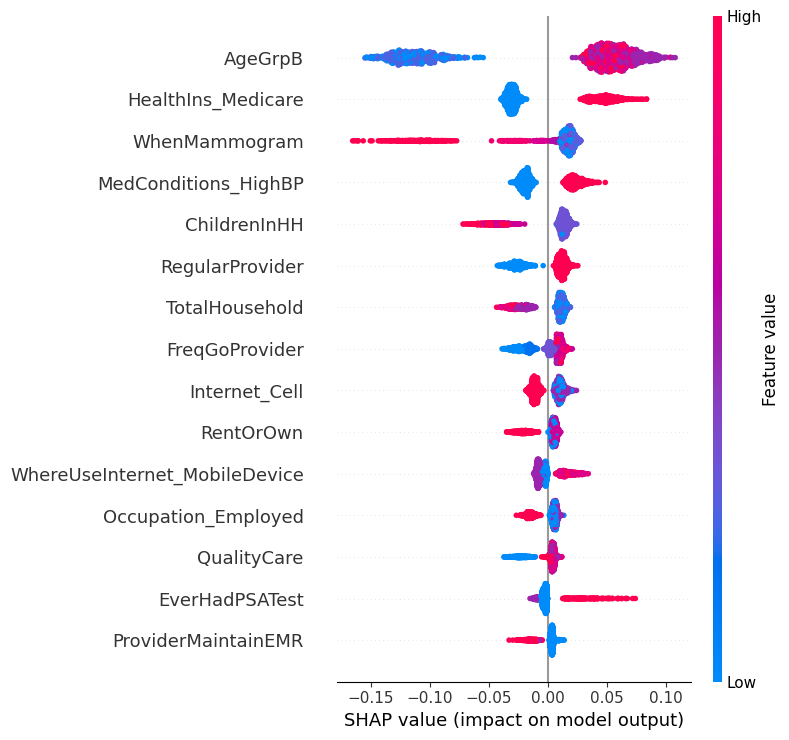

In [ ]:
# Create a summary plot for the top 15 features
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X.columns, max_display=15)

# Logistic Regression

In [ ]:
# Exclude target and unwanted variables
exclude_vars = ['Age','AgeGrpA','Weight','WeeklyMinutesModerateExercise','Height_Inches','IncomeRanges','Ever_Tested_Colon', 'HadStoolBlood', 'EverHadColSig', 'EverTestedColonCa']
X = df1.drop(columns=exclude_vars)
y = df1['Ever_Tested_Colon']

# Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (85%),and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Define the hyperparameter values for Logistic Regression with Elastic Net
C_values = [0.1, 0.5,1]
l1_ratios = [0.5, 0.7, 0.9]
max_iter_values = [800,900,1000]

# Create lists to store results of each hyperparameter combination
results = []

# 5-fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search through hyperparameters, only with Elastic Net penalty
for C in C_values:
    for l1_ratio in l1_ratios:
        for max_iter in max_iter_values:
            # Initialize the model with Elastic Net
            model = LogisticRegression(
                C=C,
                penalty='elasticnet',
                solver='saga',
                class_weight='balanced',
                l1_ratio=l1_ratio,
                max_iter=max_iter,
                random_state=42
            )

            fold_accuracies = []

            # Cross-validation loop
            print(f"\nHyperparameters: C={C}, l1_ratio={l1_ratio}, "
                  f"max_iter={max_iter}")

            for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
                # Split training into training and validation sets
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

                # Train the model on the training fold
                model.fit(X_train_fold, y_train_fold)

                # Validate the model
                val_predictions = model.predict(X_val_fold)
                fold_accuracy = accuracy_score(y_val_fold, val_predictions)
                fold_accuracies.append(fold_accuracy)

                # Print accuracy for each fold
                print(f"Fold {fold} - Validation Accuracy: {fold_accuracy:.4f}")

            # Calculate the mean accuracy for this hyperparameter combination
            avg_accuracy = np.mean(fold_accuracies)
            print(f"Average Validation Accuracy for this combination: {avg_accuracy:.4f}\n")

            # Store the results
            results.append({
                'C': C,
                'l1_ratio': l1_ratio,
                'max_iter': max_iter,
                'average_cv_accuracy': avg_accuracy
            })

# Find and print the best hyperparameter combination based on cross-validation accuracy
best_result = max(results, key=lambda x: x['average_cv_accuracy'])
print("\nBest Hyperparameters:")
print(f"C: {best_result['C']}")
print(f"l1_ratio: {best_result['l1_ratio']}")
print(f"max_iter: {best_result['max_iter']}")
print(f"Average Cross-Validation Accuracy: {best_result['average_cv_accuracy']:.4f}")

# Use the best hyperparameters to create the final Logistic Regression model
best_logistic_model = LogisticRegression(
    C=best_result['C'],
    penalty='elasticnet',
    solver='saga',
    l1_ratio=best_result['l1_ratio'],
    class_weight= 'balanced',
    max_iter=best_result['max_iter'],
    random_state=42
)

# Train the best model on the entire training set
best_logistic_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = best_logistic_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate additional performance metrics (Precision, Recall, F1, AUC)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"\nTest Set Performance for Logistic Regression:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")


Hyperparameters: C=0.1, l1_ratio=0.5, max_iter=800
Fold 1 - Validation Accuracy: 0.8125
Fold 2 - Validation Accuracy: 0.8196
Fold 3 - Validation Accuracy: 0.7868
Fold 4 - Validation Accuracy: 0.8191
Fold 5 - Validation Accuracy: 0.8048
Average Validation Accuracy for this combination: 0.8086


Hyperparameters: C=0.1, l1_ratio=0.5, max_iter=900
Fold 1 - Validation Accuracy: 0.8125
Fold 2 - Validation Accuracy: 0.8196
Fold 3 - Validation Accuracy: 0.7868
Fold 4 - Validation Accuracy: 0.8191
Fold 5 - Validation Accuracy: 0.8048
Average Validation Accuracy for this combination: 0.8086


Hyperparameters: C=0.1, l1_ratio=0.5, max_iter=1000
Fold 1 - Validation Accuracy: 0.8125
Fold 2 - Validation Accuracy: 0.8196
Fold 3 - Validation Accuracy: 0.7868
Fold 4 - Validation Accuracy: 0.8191
Fold 5 - Validation Accuracy: 0.8048
Average Validation Accuracy for this combination: 0.8086


Hyperparameters: C=0.1, l1_ratio=0.7, max_iter=800
Fold 1 - Validation Accuracy: 0.8111
Fold 2 - Validation Accur

# Random Forest

In [ ]:
features = ["AgeGrpB", "WhenMammogram", "HealthIns_Medicare", "ChildrenInHH", "MedConditions_HighBP",
            "TotalHousehold", "RegularProvider", "FreqGoProvider", "EverHadPSATest", "WhereUseInternet_MobileDevice",
            "QualityCare", "BMI", "AgeDX", "WhereUseInternet_Work", "RentOrOwn", "Occupation_Employed",
            "SocMed_Visited", "HealthInsurance2", "ProviderMaintainEMR", "AverageTimeSitting", "MedConditions_Diabetes",
            "PHQ4", "WhenPapTest", "Internet_Cell", "WhereUseInternet_PublicPlace", "FullTimeOcc_Cat",
            "FeelingsAddressed", "MostRecentCheckup2", "AvgDrinksPerWeek", "HowLongModerateExerciseMinutes",
            "TimesModerateExercise", "CENSDIV", "CaBone", "SpentEnoughTime", "ChanceAskQuestions", "Education",
            "CaPancreatic", "HelpUncertainty", "ExplainedClearly", "DrinksPerDay", "CaLeukemia", "DrinkDaysPerWeek",
            "CaStomach", "HHInc", "WhereUseInternet_Home", "UseECigNow", "CaPharyngeal", "R_HHAdults",
            "TimesStrengthTraining", "HHAdults_Num", "Nervous", "MailHHAdults", "UnderstoodNextSteps", "eCigUse",
            "EverythingCauseCancer", "HPVCauseCancer_Anal", "AverageCaloriesPerDay", "ElectCigLessHarm", "SmokeNow",
            "CaOther", "PCCScale"
            ]

# Select all the features as X
X = df1[features]
# The target variable remains the same
y = df1['Ever_Tested_Colon']

# Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (85%),and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Define the hyperparameter values to loop over for Random Forest
n_estimators = [300,400,500]
max_depth = [10,12,  15]
min_samples_split = [5,6,8]
min_samples_leaf = [2, 3, 4]

# Create lists to store results of each hyperparameter combination
results = []

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Manual grid search through hyperparameters
for n_est in n_estimators:
    for depth in max_depth:
        for min_split in min_samples_split:
            for min_leaf in min_samples_leaf:
                # Create a RandomForestClassifier with the current hyperparameters
                model = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    random_state=42
                )

                fold_accuracies = []

                # Perform 5-fold cross-validation
                print(f"\nHyperparameters: n_estimators={n_est}, max_depth={depth}, "
                      f"min_samples_split={min_split}, min_samples_leaf={min_leaf}")

                for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
                    # Split training into training and validation sets
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

                    # Train the model on the training fold
                    model.fit(X_train_fold, y_train_fold)

                    # Validate the model
                    val_predictions = model.predict(X_val_fold)
                    fold_accuracy = accuracy_score(y_val_fold, val_predictions)
                    fold_accuracies.append(fold_accuracy)

                    # Print accuracy for each fold
                    print(f"Fold {fold} - Validation Accuracy: {fold_accuracy:.4f}")

                # Calculate the mean accuracy for this hyperparameter combination
                avg_accuracy = np.mean(fold_accuracies)

                # Print average accuracy for this hyperparameter combination
                print(f"Average Validation Accuracy for this combination: {avg_accuracy:.4f}\n")

                # Store the results
                results.append({
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'min_samples_split': min_split,
                    'min_samples_leaf': min_leaf,
                    'average_cv_accuracy': avg_accuracy
                })

# Find and print the best hyperparameter combination based on cross-validation accuracy
best_result = max(results, key=lambda x: x['average_cv_accuracy'])
print("\nBest Hyperparameters:")
print(f"n_estimators: {best_result['n_estimators']}")
print(f"max_depth: {best_result['max_depth']}")
print(f"min_samples_split: {best_result['min_samples_split']}")
print(f"min_samples_leaf: {best_result['min_samples_leaf']}")
print(f"Average Cross-Validation Accuracy: {best_result['average_cv_accuracy']:.4f}")

# Use the best hyperparameters to create the final model
best_model = RandomForestClassifier(
    n_estimators=best_result['n_estimators'],
    max_depth=best_result['max_depth'],
    min_samples_split=best_result['min_samples_split'],
    min_samples_leaf=best_result['min_samples_leaf'],
    random_state=42
)

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate additional performance metrics (Precision, Recall, F1, AUC)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"\nTest Set Performance:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2
Fold 1 - Validation Accuracy: 0.8486
Fold 2 - Validation Accuracy: 0.8500
Fold 3 - Validation Accuracy: 0.8376
Fold 4 - Validation Accuracy: 0.8538
Fold 5 - Validation Accuracy: 0.8338
Average Validation Accuracy for this combination: 0.8448


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=3
Fold 1 - Validation Accuracy: 0.8495
Fold 2 - Validation Accuracy: 0.8505
Fold 3 - Validation Accuracy: 0.8376
Fold 4 - Validation Accuracy: 0.8547
Fold 5 - Validation Accuracy: 0.8329
Average Validation Accuracy for this combination: 0.8450


Hyperparameters: n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=4
Fold 1 - Validation Accuracy: 0.8486
Fold 2 - Validation Accuracy: 0.8505
Fold 3 - Validation Accuracy: 0.8371
Fold 4 - Validation Accuracy: 0.8504
Fold 5 - Validation Accuracy: 0.8362
Average Validation Accuracy for this combination: 0.8446


